<a href="https://colab.research.google.com/github/XanderGardner/xanfolio/blob/main/Lab4_HighVelocityStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To start, upload the astropy package, which we will use to access the data table.  Additionally, import all relevant Python packages.


In [ ]:
!pip install astropy

In [ ]:
from astropy import constants as const

In [ ]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Introduction

What is the speed of the fastest star in the vicinity of the Sun?  In this lab exercise, you will mine through data from the *Gaia* satellite to see for yourself!  The *Gaia* satellite (pictured below) was launched in 2013 and is providing an unprecedent look at the Milky Way galaxy.  It will ultimately provide the complete position and velocity information for nearly a billion stars in the Galaxy.  This is about 1% of all the stars in the Galaxy, and marks a huge advance over previous missions.

We expect that most stars in the Milky Way are gravitationally bound to the Galaxy, which is another way of saying that their velocities fall below the escape velocity.  However, there are a variety of reasons why unbound stars might be flying around.  For example:

1. A star that is ejected from the Milky Way's disk because a nearby supernova exploded;
2. A star that is ejected from the center of the Milky Way due to its interaction with our black hole;
3. A star that is stripped from a smaller galaxy that is passing through the Milky Way.

Identifying these unbound stars is an important first step in understanding the interesting mechanisms that can produce them.  Your goal for this lab is to curate a candidate list of stars from the *Gaia* data that have a significant probability of being unbound to the Milky Way.



![alt text](https://earth.esa.int/documents/163813/1067156/GAIA_Auto1B)

# Theoretical Model of the Milky Way Escape Velocity

Before jumping into the data analysis part of the lab, we will build a theoretical model for the gravitational potential of the Milky Way and plot its escape velocity.

A word of caution for what follows: Coordinate definitions are going to be critical, so you should play close attention to whether you are using spherical or cylindrical coordinates.  In general, we will use a lower-case "r" to denote the radius to the center of the Galaxy in spherical coordinates.  We will use an upper-case "R" to denote the radius to the center of the Galaxy in cylindrical coordinates.  Also in cylindrical, "z" is the vertical distance above and below the plane of the Milky Way's disk.  In general,

$$ r^2 = R^2 + z^2 $$

### **Exercise 1**
**[5 points]** 

In the following markdown box, show your derivation for the escape velocity as a function of $-|\Phi(r)|$, the gravitational potential energy of the Milky Way, where $r$ is the radial distance to the Galactic Center (in spherical coordinates).

*Important* : Our convention is to take the potential energy per star mass.  Therefore, $\Phi(r)$ as given has the mass of the star divided out.

### Derivation of Escape Velocity

Using the conservation of Energy, we have: \\

$$ T_0 + V_0 = 0 $$ 
where $T_0$ is the initial kinetic energy per star mass, $\frac{1}{2}v_0^2$ and $V_0$ is the initial potential energy per star mass of the milky way, $-|\Phi(r)|$. Note that the final gravitational potential energy and kinetic energy are zero because the object travels infinitely far from the galaxy. \\

Hence: \\
$$\frac{1}{2}v_0^2 = |\Phi(r)|$$ 
$$v_0 = \sqrt{(2|\Phi(r)|)}$$


### **Exercise 2**
**[20 points]**

We will model the Milky Way potential as a sum of three components: 

1. A dark matter halo 
2. A stellar disk 
3. A stellar bulge

The gravitational potentials for these three components are given below. Assuming this model, plot the total Milky Way escape velocity for $R = 0-30$ kpc and $z=0$ kpc.  On the same plot, show the individual contributions from the dark matter halo, stellar disk, and bulge.  Using these results, 

*   Describe the role that each component plays in setting the escape velocity as $R\rightarrow0$ kpc and as $R \rightarrow 30$ kpc.
*   Estimate the escape velocity near the Sun ($R=8$ kpc, $z=0$ kpc).


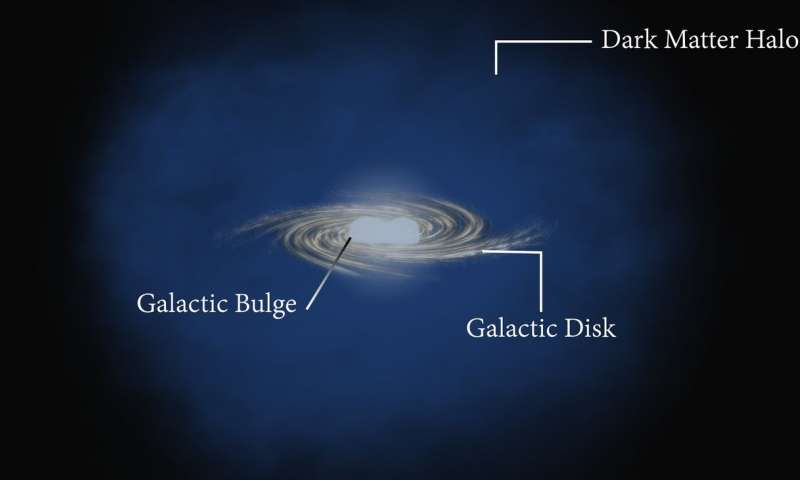

Image Credit: Australian National University



**Dark Matter Potential**:  In this model, the stellar disk is surrounded by a vast "halo" of dark matter.  Dark matter is a form of matter that we believe exists due to its gravitational effect on galaxies (amongst other pieces of evidence), however we do not yet know the fundamental particle nature of dark matter.  It is referred to as "dark" because it does not emit visible light, so we cannot see it with standard optical surveys.  We hypothesize that the potential of the dark matter halo is given by:

$$ \Phi_h(r) = - \frac{G M_h}{r} \ln\Big(1+\frac{r}{r_s}\Big)  \, $$

where $G$ is Newton's gravitational constant, $M_h$ is the halo mass and $r_s$ is a specified length scale.  You may assume that $M_h = 8 \times 10^{11} M_\odot$ and $r_s = 16$ kpc.  ($M_\odot$ is the unit for solar mass.)



**Stellar Disk Potential**:  Perhaps the most iconic image of the Milky Way galaxy is its stellar disk.  The gravitational potential for the stellar disk is

$$ \Phi_d(R, z) = \frac{-G M_d}{\sqrt{R^2 + \big(a + \sqrt{z^2 + b^2}\big)^2}} $$

where $M_d$ is the disk mass, and $a$ and $b$ are specified length scales.  You may take $M_d = 7\times 10^{10}~M_\odot$, $a= 3$ kpc and $b=0.28$ kpc.

**Stellar Bulge**: The bulge is a roughly spherical distribution of stars concentrated near the center of the Milky Way.  We will model its potential as follows:

$$ \Phi_b(r) = - \frac{G M_b}{r + r_b} $$

where $M_b$ is the bulge mass and $r_b$ is a specified scale length.  You may take $M_b = 5\times10^9~M_\odot$ and $r_b = 1$ kpc. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


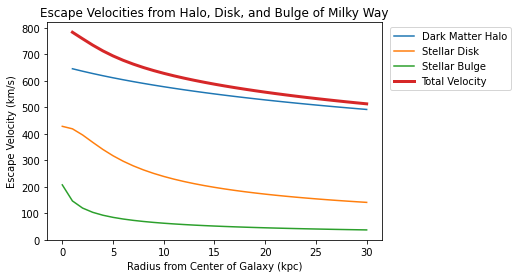

In [ ]:
##Enter your code here

# Define variables
G = 4.301e-6      #Gravitational Constant (in terms of solar masses and kpc)
DM_mass = 8e11    #Dark matter halo mass
Disk_mass = 7e10  #Stellar Disk mass
bulge_mass = 5e9  #Stellar Bulge mass
a = 3.0           #scale length for disk
b = 0.28          #Scale length for disk
halo_radius = 16  #Scale length for halo 

# This function calculates the total inital potential energy 
def potential_energy(R):
  
  # PE for Dark Matter Halo
  r_dm = R
  DM_halo = (-G*DM_mass/r_dm)*np.log(1+(r_dm/halo_radius))
  # PE for Stellar Disk
  disk = (-G*Disk_mass)/np.sqrt(R**2 + (a+b)**2)
  # PE for Stellar Bulge
  r_bulge = R
  bulge = -(G*bulge_mass)/(r_bulge+1)
  # Total PE
  PE_total = DM_halo + disk + bulge

  return(DM_halo, disk, bulge, PE_total)

R_array = np.arange(0,31)  #Cylindrical radius to center of Galaxy (0=30 kpc)
DM_halo, disk, bulge, PE_total = potential_energy(R_array)

# Calculate the escape velocities
dm_vel    = np.sqrt(np.abs(DM_halo)*2)  #DM_halo
disk_vel  = np.sqrt(np.abs(disk)*2)     #Disk
bulge_vel = np.sqrt(np.abs(bulge)*2)    #Bulge
total_vel = np.sqrt(np.abs(PE_total)*2) #Total escape velocity

#Plot
plt.plot(R_array, dm_vel, label="Dark Matter Halo")
plt.plot(R_array, disk_vel, label='Stellar Disk')
plt.plot(R_array, bulge_vel, label='Stellar Bulge')
plt.plot(R_array, total_vel, label='Total Velocity', linewidth=3)
plt.title("Escape Velocities from Halo, Disk, and Bulge of Milky Way")
plt.ylabel('Escape Velocity (km/s)')
plt.xlabel('Radius from Center of Galaxy (kpc)')
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

In [ ]:
#Escape Velocity Near the Sun
DM_halo_sun, disk_sun, bulge_sun, sun_potential = potential_energy(8)
sun_vel = np.sqrt(2*np.abs(sun_potential))

print('Escape Velocity Near the Sun: ' + str(sun_vel) + ' km/s')

Escape Velocity Near the Sun: 650.5392937085393 km/s


#### Describe the role that each component plays in setting the escape velocity as $R\rightarrow0$ kpc and as $R \rightarrow 30$ kpc. \\

As $R\rightarrow0$ kpc, the escape velocity of the dark matter halo approaches 650 km/s, the escape velocity of the stellar disk approaches 450 km/s, and the escape velocity of the stellar bulge approaches 210 km/s. These components contribute to the total escape velocity from the milky way because as $R\rightarrow0$ kpc the total escape velocity approaches 800 km/s. \\
As $R\rightarrow30$ kpc, the escape velocity of the dark matter halo approaches 550 km/s, the escape velocity of the stellar disk approaches 200 km/s, and the escape velocity of the stellar bulge approaches 50 km/s. These components contribute to the total escape velocity from the milky way because as $R\rightarrow0$ kpc the total escape velocity approaches 600 km/s.

# *Gaia* Data Analysis

The data file (gaia_spectro.hdf5) can be downloaded from the link provided in Footnote 3 of [this paper](https://arxiv.org/pdf/1806.02324.pdf).  You can reference Table B1 in that paper's appendix to see the format of the table.  

You can use the following code cell to read in the data table.  Make sure to update the filename appropriately for your own directory!

In [ ]:
filename='/content/gdrive/My Drive/gaia_spectro.hdf5'
data = Table.read(filename)

For a complete description of each of the columns, you can type

`data.meta['COMMENT']`

To access the data from any particular column as an array, just type

`data['<column name>']`

For example, to pull up an array of the cylindrical radius $R$ for each star, you would type

`data['R']`

and the error on this value is obtained using

`data['R_err']`

### **Exercise 3**
**[20 points]**

Read in the data file and apply the cleaning cuts that are described below.  After applying each cut sequentially,  

*   Show how many stars in your dataset survive the selection
*   Convince the reader (either through a figure or some other summary statistic) that you have applied the selection cut correctly



Apply the selection cuts in the following order:


1.  **Best Star Selection** : There can be potential issues with the derivation of the stellar parameters in the *Gaia* data.  For that reason, we will want to select the subset of *Gaia* stars with  no recorded issues.  These are the stars for which `data['best'] == 1`

2.  **Solar Neighborhood Selection** : We will focus on stars that are located near the Sun (i.e., in the 'solar neighborhood').  Specifically, we require that `data['s'] < 3`. 

3.  **Giants Selection** : We will restrict to a class of stars called 'giants'.  These are selected by requiring that the stellar surface gravity satisfies `data['logg'] < 3` and that the (log of the) stellar  effective temperature satisfies `'log10_teff' < 3.73`.


Original number of stars: 4906746
Number of best stars (without errors): 3318118
-------------------------- Before Selection -------------------------------
Mean: 0.676235941293884
Standard Deviation: 0.4679112020418606
-------------------------- After Selection --------------------------------
Mean: 1.0
Standard Deviation: 0.0


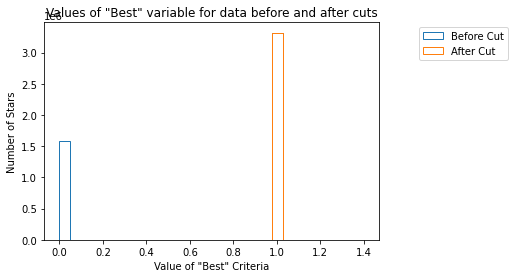

In [ ]:
## Enter your code here
#Best Star Selection (acknowledgements: with the help of connor at office hours)
best_stars = data[(data['best']==1)]

#Print number of stars before and after selection 
print("Original number of stars: " + str(len(data)))
print("Number of best stars (without errors): " + str(len(best_stars)))

################################### Summary Statistics ############################
print("-------------------------- Before Selection -------------------------------")
print('Mean: ' + str(np.mean(data['best'])))
print("Standard Deviation: " + str(np.std(data['best'])))

print("-------------------------- After Selection --------------------------------")
print("Mean: " + str(np.mean(best_stars['best'])))
print("Standard Deviation: " + str(np.std(best_stars['best'])))

######################################## PLOT ######################################
# make plot of the before and after to convince reader that selections are made appropriately
plt.hist(data['best'], bins=30, range=(0, 1.4), label='Before Cut', histtype='step')
plt.hist(best_stars['best'], range=(0, 1.4), bins=30, label='After Cut', histtype='step')
plt.legend(bbox_to_anchor=(1.4, 1))
plt.title('Values of "Best" variable for data before and after cuts')
plt.xlabel('Value of "Best" Criteria')
plt.ylabel('Number of Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


Original number of stars: 3318118
Number of stars after selecting stars near the sun : 2735140
-------------------------- Before Selection -------------------------------
Maximum Distance to Sun: nan
-------------------------- After Selection --------------------------------
Maximum Distance to Sun: 2.9999960268496166


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


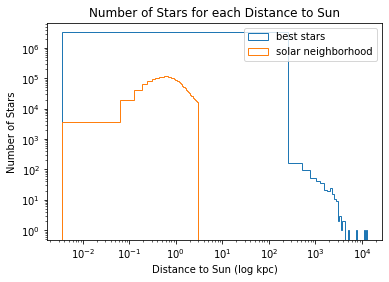

In [ ]:
# Solar Neighborhood Selection
solar_nhbd = best_stars[(best_stars['s']<3)]

#Print number of stars before and after selection 
print("Original number of stars: " + str(len(best_stars)))
print("Number of stars after selecting stars near the sun : " + str(len(solar_nhbd)))

################################### Summary Statistics ############################
print("-------------------------- Before Selection -------------------------------")
print('Maximum Distance to Sun: ' + str(np.max(best_stars['s'])))

print("-------------------------- After Selection --------------------------------")
print("Maximum Distance to Sun: " + str(np.max(solar_nhbd['s'])))

######################################## PLOT ######################################
# (make plot of the before and after to convince reader that selections are made appropriately)
plt.hist(best_stars['s'], bins = 50, histtype="step", label = 'best stars')
plt.hist(solar_nhbd['s'], bins = 50, histtype="step", label = 'solar neighborhood')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Distance to Sun (log kpc)')
plt.ylabel('Number of Stars')
plt.title('Number of Stars for each Distance to Sun')
plt.legend()
plt.show()

Original number of stars: 2735140
Number of stars after selecting giants: 421366
-------------------------- Before Selection -------------------------------
Maximum stellar surface gravity: 5.452985665142021
Maximum stellar effective temperature: 4.310122353177109
-------------------------- After Selection --------------------------------
Maximum stellar surface gravity: 2.9999984645309254
Maximum stellar effective temperature: 3.729989837814556


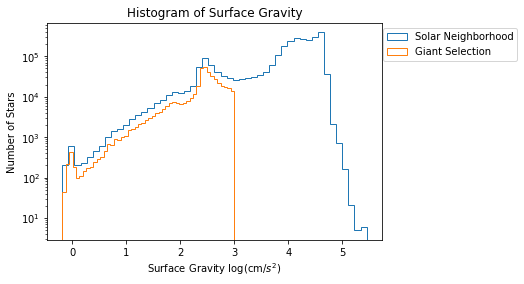

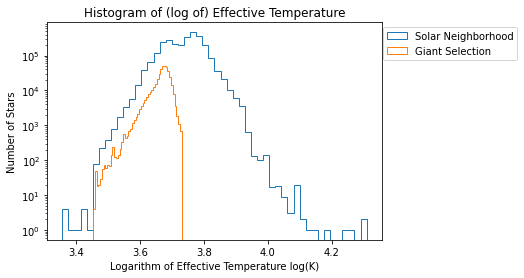

In [ ]:
#Xander
logg_sel = solar_nhbd[(solar_nhbd['logg'] < 3)]
giant_sel = logg_sel[(logg_sel['log10_teff'] < 3.73)]

#Print number of stars before and after selection
print("Original number of stars: " + str(len(solar_nhbd)))
print("Number of stars after selecting giants: " + str(len(giant_sel)))

################################### Summary Statistics ############################
print("-------------------------- Before Selection -------------------------------")
print('Maximum stellar surface gravity: ' + str(np.max(solar_nhbd['logg']))) 
print('Maximum stellar effective temperature: ' + str(np.max(solar_nhbd['log10_teff'])))

print("-------------------------- After Selection --------------------------------")
print('Maximum stellar surface gravity: ' + str(np.max(giant_sel['logg']))) 
print('Maximum stellar effective temperature: ' + str(np.max(giant_sel['log10_teff'])))

######################################## PLOT ######################################
# (make plot of the before and after to convince reader that selections are made appropriately)
plt.hist(solar_nhbd['logg'], bins = 50, histtype="step", label = 'Solar Neighborhood')
plt.hist(giant_sel['logg'], bins = 50, histtype="step", label = 'Giant Selection')
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Surface Gravity log(cm/$s^2$)')
plt.ylabel('Number of Stars')
plt.title('Histogram of Surface Gravity')
plt.legend(bbox_to_anchor=(1.42, 1))
plt.show()

plt.hist(solar_nhbd['log10_teff'], bins = 50, histtype="step", label = 'Solar Neighborhood')
plt.hist(giant_sel['log10_teff'], bins = 50, histtype="step", label = 'Giant Selection')
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Logarithm of Effective Temperature log(K)')
plt.ylabel('Number of Stars')
plt.title('Histogram of (log of) Effective Temperature')
plt.legend(bbox_to_anchor=(1.42, 1))
plt.show()

### **Exercise 4**
**[20 points]**

You have the cylindrical velocity components ($v_R$, $v_\phi$, and $v_z$) for each star in your list.  Use this information to:

1.   Calculate the total speed of each star.

2.   Calculate the uncertainty, $\sigma_v$, in the total speed for each star.  This will require that you appropriately propagate errors for each of the star's velocity components.  Show your derivation of the total speed uncertainty.  You can start from the following uncertainty relationship:

$$\sigma_f = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 \sigma_x^2 
+ \left(\frac{\partial f}{\partial y}\right)^2 \sigma_y^2 +\left(\frac{\partial f}{\partial z}\right)^2 \sigma_z^2}$$

for any quantity $f(x, y, z)$.

3.  Use plt.hexbin() to plot the fractional speed uncertainty ($\sigma_v/v$) for each star as a function of its total speed.  You might find it helpful to set

```xscale='log', yscale='log', bins='log'```

in the hexbin parameters.



###### Our Solution Here:
Speed star is defined by the function f:

$$f(v_R, v_\phi, v_z) = \sqrt{v_R^2 + v_\phi^2 + v_z^2}$$

So the uncertainty is: (note that $\sigma_R$ represents the undercertainty of $v_R$)

$$\sigma_f = \sqrt{\left(\frac{\partial f}{\partial v_R}\right)^2 \sigma_R^2 
+ \left(\frac{\partial f}{\partial v_\phi}\right)^2 \sigma_\phi^2 +\left(\frac{\partial f}{\partial v_z}\right)^2 \sigma_z^2}$$

Solving the partial derivatives and simplifying:

$$\left(\frac{\partial f}{\partial v_R}\right)^2 = \frac{v_R^2}{v_R^2 + v_\phi^2 + v_z^2}$$

$$\left(\frac{\partial f}{\partial v_\phi}\right)^2 = \frac{v_\phi^2}{v_R^2 + v_\phi^2 + v_z^2}$$

$$\left(\frac{\partial f}{\partial v_z}\right)^2 = \frac{v_z^2}{v_R^2 + v_\phi^2 + v_z^2}$$

Simplifying the uncertainty:

$$\sigma_f = \sqrt{\frac{\sigma_R^2 v_R^2 + \sigma_\phi^2 v_\phi^2 + \sigma_z^2 v_z^2}{v_R^2 + v_\phi^2 + v_z^2}}$$


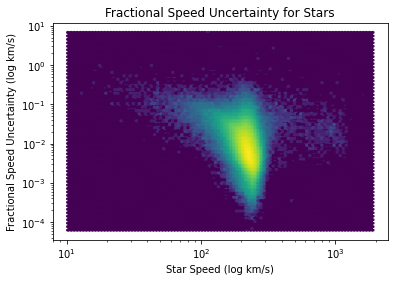

In [ ]:
# Define variables
vel_R   = giant_sel['vR']
vel_phi = giant_sel['vphi']
vel_z   = giant_sel['vz']
vel_R_error   = giant_sel['vR_err']
vel_phi_error = giant_sel['vphi_err']
vel_z_error   = giant_sel['vz_err']

#Calculate total speed of each star
def speed_star_tot(vr, vphi, vz):
 return np.sqrt(vr**2 + vphi**2 + vz**2)

#Calculate the error associated with each total speed
def speed_uncertainty2(vr, vrer, vphi, vphier, vz, vzer):
  sum1 = np.square(vrer) * np.square(vr) / np.square(speed)
  sum2 = np.square(vphier) * np.square(vphi) / np.square(speed)
  sum3 = np.square(vzer) * np.square(vz) / np.square(speed)
  sum4 = sum1 + sum2 + sum3
  return np.sqrt(sum4)
  
speed = speed_star_tot(giant_sel['vR'], giant_sel['vphi'], giant_sel['vz'])
tot_uncertainty = speed_uncertainty2(vel_R, vel_R_error, vel_phi, vel_phi_error, vel_z, vel_z_error )

#Fractional Speed Uncertainty
speed_uncertainties = tot_uncertainty / speed

#Plot the frac speed uncertainties
plt.hexbin(speed, speed_uncertainties, bins='log', xscale='log', yscale='log')
plt.title('Fractional Speed Uncertainty for Stars')
plt.ylabel('Fractional Speed Uncertainty (log km/s)')
plt.xlabel('Star Speed (log km/s)')
plt.show()

### **Exercise 5**
**[15 points]**

Moving forward, we will only focus on stars with relatively small speed uncertainties.  For this exercise, 

1.   Select stars with a fractional speed uncertainty $\leq 0.3$.  How many stars survive this selection cut?  Convince the reader that your selection cut was applied correctly.
2.   What is the average speed of the stars that survive this selection cut?  How does the value you get compare to the velocity of the Sun about the center of the Galaxy.  For the Sun, $(v_R, v_\phi, v_z) \sim (0, 220, 0)$ km/s.



Original number of stars: 421366
Number of stars with uncertainity less than or equal to 0.3: 421205


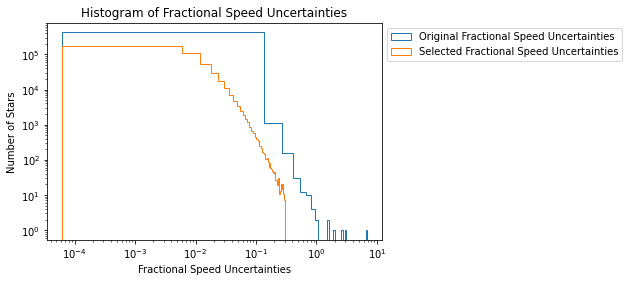

Average speed of stars after selection: 220.7977554220696 km/s
Speed of the sun: 220.0 km/s


In [ ]:
# Apply the selection
is_speed_accurate = [x <= .3 for x in speed_uncertainties]
speed_certainty_sel = giant_sel[is_speed_accurate]

# How many stars in your dataset survive the selection
print("Original number of stars: " + str(len(giant_sel)))
print("Number of stars with uncertainity less than or equal to 0.3: " + str(len(speed_certainty_sel)))

# identify list of fractional speed uncertainties for the new list to graph
speed_certainty_data = []
for i in range(len(is_speed_accurate)):
  if is_speed_accurate[i]:
    speed_certainty_data.append(speed_uncertainties[i])

# (make plot of the before and after to convince reader that selections are made appropriately)
plt.hist(speed_uncertainties, bins = 50, histtype="step", label = 'Original Fractional Speed Uncertainties')
plt.hist(speed_certainty_data, bins = 50, histtype="step", label = 'Selected Fractional Speed Uncertainties')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Fractional Speed Uncertainties')
plt.ylabel('Number of Stars')
plt.title('Histogram of Fractional Speed Uncertainties')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

######################## prt 2: new avg speed of stars #####################

# function returns the speed of the star given the row in the table
def speed_star_new(row_of_star):
  vel_R   = speed_certainty_sel['vR'][row_of_star]
  vel_phi = speed_certainty_sel['vphi'][row_of_star]
  vel_z   = speed_certainty_sel['vz'][row_of_star]
  return(np.sqrt(vel_R**2 + vel_phi**2 + vel_z**2))

# find average speed of the new sel stars in speed_certainty_sel
new_star_speed_data = []
sum = 0
total = len(speed_certainty_sel['vR'])
for i in range(len(speed_certainty_sel['vR'])):
  new_star_speed_data.append(speed_star_new(i))
  sum += new_star_speed_data[i]
avg_speed = sum / total

# speed of the Sun
sun_speed = 220.0

# output findings and comparison
print("Average speed of stars after selection: " + str(avg_speed) + " km/s")
print("Speed of the sun: " + str(sun_speed) + " km/s")

The average speed of the stars is just greater than the speed of the Sun

In [ ]:
# Check that the selections were made appropriately

is_uncertain_less = np.array([x <= 0.3 for x in speed_uncertainties])
speed_certain = [speed_uncertainties[i] for i in range(len(speed_uncertainties)) if is_uncertain_less[i] == 1]
speed_uncertainties = speed_certain
maxun = np.max(speed_uncertainties)
print("Max Fractional Speed Uncertainty of remaining stars: " + str(maxun))

new_speed = [new_star_speed_data[i] for i in range(len(new_star_speed_data)) if is_uncertain_less[i] == 1]
new_star_speed_data = new_speed
avgun = np.average(new_star_speed_data)
print("Average Speed of remaining of surviving stars: " + str(avgun))

Max Fractional Speed Uncertainty of remaining stars: 0.29869445911985626
Average Speed of remaining of surviving stars: 220.7988124421883


### **Exercise 6**
**[20 points]**

To identify a candidate list of high-velocity stars, choose those stars  whose observed speed is greater than the theoretically predicted escape speed (at the star's position) by more than 5 times the speed error.  

1.   How many candidates do you find?  What fraction of the total dataset (after applying the fractional error selection) do they comprise?

2.   What is the mean speed of the stars in your candidate list?  What is the maximum and minimum speed of the stars in your candidate list?

3. Make a [quiver plot](https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.15-Quiver-and-Stream-Plots/) for your candidate stars.  The $x$-axis should correspond to the (cylindrical) radial position of the star, while the $z$-axis should correspond to its vertical distance from the plane.  Each star should be denoted by an arrow whose $x$-direction is set by $v_R$ and $y$-direction is set by $v_z$.  Describe how the Sun would look like on this plot.  How do your candidate stars differ from the Sun's expected behavior?



In [ ]:
# function returns the uncertainty of the star for the given row in the table
def speed_star_tot2():
  vel_R2         = speed_certainty_sel['vR']
  vel_phi2       = speed_certainty_sel['vphi']
  vel_z2         = speed_certainty_sel['vz']
  return np.sqrt(vel_R2**2 + vel_phi2**2 + vel_z2**2)

#Find total speeds of stars
speed_star_totals2 = speed_star_tot2()

#Function returns the error of the velocities of the stars
def new_speed_uncertainty():
  vel_R_error2   = speed_certainty_sel['vR_err']
  vel_phi_error2 = speed_certainty_sel['vphi_err']
  vel_z_error2   = speed_certainty_sel['vz_err']
  vel_R3         = speed_certainty_sel['vR']
  vel_phi3       = speed_certainty_sel['vphi']
  vel_z3         = speed_certainty_sel['vz']
  sum1 = np.square(vel_R_error2) * np.square(vel_R3) / np.square(np.sqrt(vel_R3**2 + vel_phi3**2 + vel_z3**2))
  sum2 = np.square(vel_phi_error2) * np.square(vel_phi3) / np.square(np.sqrt(vel_R3**2 + vel_phi3**2 + vel_z3**2))
  sum3 = np.square(vel_z_error2) * np.square(vel_z3) / np.square(np.sqrt(vel_R3**2 + vel_phi3**2 + vel_z3**2))
  sum4 = sum1 + sum2 + sum3
  return np.sqrt(sum4)

# find speed uncertainty of the new sel stars in speed_certainty_sel
new_speed_uncertainties = new_speed_uncertainty()

In [ ]:
### Find list of high velocity stars
### first find theoretically predicted escape speed for each star

# function returns the escape velocity at the given R value
def escape_velocity(R):
  # PE for Dark Matter Halo
  r_dm = R
  DM_halo = (-G*DM_mass/r_dm)*np.log(1+(r_dm/halo_radius))
  # PE for Stellar Disk
  disk = (-G*Disk_mass)/np.sqrt(R**2 + (a+b)**2)
  # PE for Stellar Bulge
  r_bulge = R
  bulge = -(G*bulge_mass)/(r_bulge+1)
  # Total PE
  PE_total = DM_halo + disk + bulge

  # Calculate the escape velocity
  total_vel = np.sqrt(np.abs(PE_total)*2)
  return total_vel

# Calculate the escape velocities for all stars 
escape_vel_data = []
for distanceR in speed_certainty_sel['R']:
  escape_vel_data.append(escape_velocity(distanceR))

In [ ]:
### Select stars based on:  (observed speed) - 5*(speed error) > (theoretical escape speed) 
is_high_velocity = [speed_star_totals2 - 5*new_speed_uncertainties >  escape_vel_data]
high_speed_sel = speed_certainty_sel[is_high_velocity]

/usr/local/lib/python3.6/dist-packages/astropy/table/table.py:1187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


In [ ]:
# Find how many candidates survived
print("Number of Candidates Survived: " + str(len(high_speed_sel)))

#Find the fraction of the total dataset that is the hgih velocity stars
print("Fraction of the total dataset that survived: " + str(len(high_speed_sel)/len(data)))
print("Fraction of the certainty validated dataset that survived: " + str(len(high_speed_sel)/len(speed_certainty_sel)))

#Find Mean Speed of High Velocity Stars Table:
high_velR = high_speed_sel['vR']
high_velPhi = high_speed_sel['vphi']
high_velz = high_speed_sel['vz']

high_vel_total = np.sqrt(high_velR**2 + high_velPhi**2 + high_velz**2)

print("Mean Speed of the High Velocity Stars: " + str(np.sum(high_vel_total)/len(high_speed_sel)) + "")

#Find min and max speeds of High Velocity stars
print("Minimum Speed of High Velocity Stars:  " + str(np.min(high_vel_total)) + " km/s")
print("Maxmimum Speed of High Velocity Stars: " + str(np.max(high_vel_total)) + " km/s")

Number of Candidates Survived: 261
Fraction of the total dataset that survived: 5.319207474770449e-05
Fraction of the certainty validated dataset that survived: 0.000619650763879821
Mean Speed of the High Velocity Stars: 935.7880002468878
Minimum Speed of High Velocity Stars:  688.5674544484727 km/s
Maxmimum Speed of High Velocity Stars: 1894.5050499898282 km/s


Further Showing that the Selection was Applied Correctly:

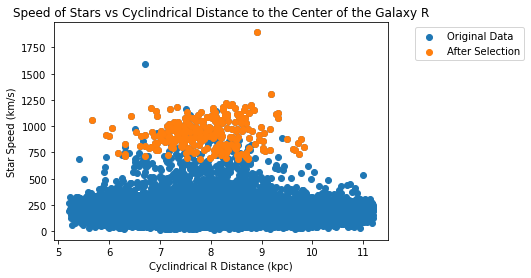

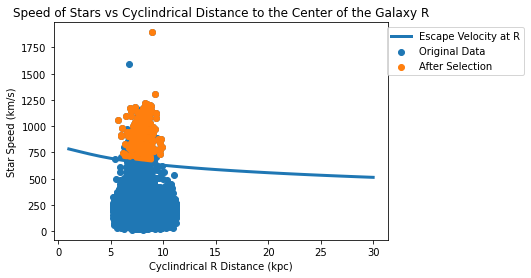

In [ ]:
## create array of velocities of stars in high_speed_sel
high_speeds_data = []
for i in range(len(high_speed_sel['R'])):
  vel_R   = high_speed_sel['vR'][i]
  vel_phi = high_speed_sel['vphi'][i]
  vel_z   = high_speed_sel['vz'][i]
  high_speeds_data.append(np.sqrt(vel_R**2 + vel_phi**2 + vel_z**2))

## create array of velocities of stars in original speed_certainty_sel
new_star_speed_data = []
for i in range(len(speed_certainty_sel['R'])):
  vel_R   = speed_certainty_sel['vR'][i]
  vel_phi = speed_certainty_sel['vphi'][i]
  vel_z   = speed_certainty_sel['vz'][i]
  new_star_speed_data.append(np.sqrt(vel_R**2 + vel_phi**2 + vel_z**2))

# plot speed of star vs cyclindrical distance R for each table
plt.scatter(speed_certainty_sel['R'], new_star_speed_data, label='Original Data')
plt.scatter(high_speed_sel['R'], high_speeds_data, label='After Selection')
plt.xlabel('Cyclindrical R Distance (kpc)')
plt.ylabel('Star Speed (km/s)')
plt.title('Speed of Stars vs Cyclindrical Distance to the Center of the Galaxy R')
plt.legend(bbox_to_anchor=(1.42, 1))
plt.show()

# plot speed of star vs cyclindrical distance R for each table with escape veloctiy shown
plt.scatter(speed_certainty_sel['R'], new_star_speed_data, label='Original Data')
plt.scatter(high_speed_sel['R'], high_speeds_data, label='After Selection')
plt.plot(R_array, total_vel, label='Escape Velocity at R', linewidth=3)
plt.xlabel('Cyclindrical R Distance (kpc)')
plt.ylabel('Star Speed (km/s)')
plt.title('Speed of Stars vs Cyclindrical Distance to the Center of the Galaxy R')
plt.legend(bbox_to_anchor=(1.42, 1))
plt.show()


Quiver Plot:

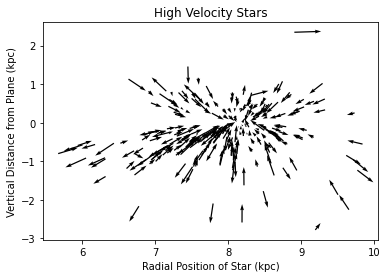

In [ ]:
fig, ax = plt.subplots()
ax.quiver(high_speed_sel['R'], high_speed_sel['z'], high_speed_sel['vR'], high_speed_sel['vz'])
ax.set_title('High Velocity Stars')
plt.ylabel('Vertical Distance from Plane (kpc)')
plt.xlabel('Radial Position of Star (kpc)')
plt.show()

### Describe how the sun would look like on this plot

### How do the candidates differ from the Sun's expected behavior

It is given that, for the Sun, $(v_R, v_\phi, v_z) \sim (0, 220, 0)$ km/s. Since the arrows $x$-direction is set by $v_R$ and $y$-direction is set by $v_z$, the sun would have no arrow since its velocity in these directions is 0; the sun would appear as a dot. Logically, this means that the sun is in a circular orbit. The high velocity stars differ from the sun in that they have radial and z-direction velocities, which is due to the fact that they are not orbiting the galaxy since their velocity is greater than their escape velocity.



This assignment represents my own work in accordance with University regulations.

- Xander Gardner
- Helen Shao
- Luci Doogan